In [27]:
import pandas as pd
import numpy as np
import pingouin
import re

In [28]:
data = pd.read_csv("ECG_study.csv", header=0).drop(columns="Unnamed: 0")
data.columns = [re.sub(r"\.[0-9]*", "", x) for x in data.columns]
data

HD1  HD2  AI1  FHD  AI2  Appropriateness  Comprehensibility  Utility  HD1  \
0   1.0  1.0  0.0  1.0  0.0              5.0                4.0      5.0  0.0   
1   1.0  1.0  0.0  1.0  1.0              6.0                6.0      5.0  0.0   
2   1.0  1.0  1.0  1.0  1.0              4.0                5.0      5.0  0.0   
3   1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  1.0   
4   1.0  1.0  0.0  1.0  0.0              5.0                6.0      6.0  1.0   
5   1.0  1.0  0.0  1.0  0.0              6.0                6.0      5.0  1.0   
6   1.0  1.0  1.0  1.0  1.0              4.0                6.0      4.0  0.0   
7   1.0  1.0  0.0  1.0  0.0              NaN                NaN      NaN  1.0   
8   1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  0.0   
9   1.0  1.0  0.0  1.0  0.0              5.0                6.0      4.0  0.0   
10  1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  1.0   
11  1.0  1.0  0.0  1.0  0.0              6.0                6.0      3.0  0.0   
12  0.0  1.0  1.0  1.0  1.0              6.0                6.0      6.0  1.0   
13  0.0  0.0  0.0  1.0  1.0              6.0                6.0      6.0  0.0   
14  1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  1.0   
15  1.0  1.0  0.0  1.0  0.0              5.0                6.0      4.0  1.0   
16  1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  0.0   
17  1.0  1.0  1.0  1.0  1.0              6.0                6.0      6.0  0.0   
18  1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  0.0   
19  1.0  1.0  1.0  1.0  1.0              5.0                5.0      6.0  2.0   
20  1.0  1.0  0.0  1.0  0.0              6.0                6.0      6.0  1.0   
21  NaN  1.0  0.0  1.0  0.0              4.0                5.0      5.0  NaN   
22  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
23  NaN  1.0  0.0  1.0  0.0              6.0                6.0      5.0  NaN   
24  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
25  NaN  1.0  0.0  1.0  0.0              5.0                5.0      4.0  NaN   
26  NaN  1.0  0.0  1.0  0.0              5.0                5.0      5.0  NaN   
27  NaN  1.0  0.0  1.0  0.0              5.0                5.0      5.0  NaN   
28  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
29  NaN  1.0  0.0  1.0  0.0              4.0                5.0      5.0  NaN   
30  NaN  1.0  0.0  1.0  0.0              6.0                5.0      3.0  NaN   
31  NaN  1.0  0.0  1.0  0.0              5.0                6.0      6.0  NaN   
32  NaN  1.0  1.0  1.0  1.0              5.0                6.0      4.0  NaN   
33  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
34  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
35  NaN  1.0  0.0  1.0  0.0              6.0                5.0      5.0  NaN   
36  NaN  1.0  0.0  1.0  0.0              4.0                4.0      4.0  NaN   
37  NaN  1.0  0.0  1.0  0.0              6.0                6.0      4.0  NaN   
38  NaN  1.0  0.0  1.0  0.0              5.0                3.0      3.0  NaN   
39  NaN  1.0  0.0  1.0  0.0              4.0                4.0      4.0  NaN   
40  NaN  1.0  0.0  1.0  0.0              6.0                6.0      6.0  NaN   
41  NaN  1.0  0.0  1.0  0.0              4.0                NaN      NaN  NaN   
42  NaN  1.0  0.0  1.0  0.0              5.0                5.0      5.0  NaN   
43  NaN  1.0  1.0  1.0  1.0              6.0                6.0      6.0  NaN   

    HD2  ...  HD2  AI1  FHD  AI2  Appropriateness  Comprehensibility  Utility  \
0   1.0  ...  0.0  0.0  0.0  0.0              6.0                6.0      6.0   
1   1.0  ...  0.0  1.0  0.0  1.0              6.0                6.0      6.0   
2   0.0  ...  0.0  1.0  0.0  1.0              5.0                5.0      5.0   
3   1.0  ...  0.0  0.0  0.0  1.0  

In [29]:
accs_first = data.loc[:,"HD1"].sum(axis=1)/cases
accs_first = pd.concat([accs_first, data["Group"], data["Expertise"]], axis=1)
accs_first.loc[accs_first["Group"] == "AI-first", 0] = np.nan

accs_before = data.loc[:,"HD2"].sum(axis=1)/cases
accs_before = pd.concat([accs_before, data["Group"], data["Expertise"]], axis=1)

accs_after = data.loc[:,"FHD"].sum(axis=1)/cases
accs_after = pd.concat([accs_after, data["Group"], data["Expertise"]], axis=1)

accs_first = accs_first[accs_before[0] > 0.00]
accs_after = accs_after[accs_before[0] > 0.00]
accs_before = accs_before[accs_before[0] > 0.00]
accs_after

0  Group Expertise
0   0.50  Hound    Novice
1   0.60  Hound    Novice
2   0.65  Hound    Novice
3   0.75  Hound    Expert
4   0.75  Hound    Novice
5   0.70  Hound    Expert
6   0.60  Hound    Novice
7   0.65  Hound    Expert
8   0.65  Hound    Expert
9   0.60  Hound    Expert
10  0.75  Hound    Novice
11  0.75  Hound    Expert
12  0.75  Hound    Novice
13  0.75  Hound    Novice
14  0.60  Hound    Novice
15  0.65  Hound    Expert
16  0.65  Hound    Novice
17  0.70  Hound    Novice
18  0.75  Hound    Novice
19  0.80  Hound    Expert
20  0.70  Hound    Expert
21  0.80    Ram    Expert
22  0.80    Ram    Novice
23  0.75    Ram    Novice
24  0.80    Ram    Novice
25  0.75    Ram    Expert
26  0.85    Ram    Novice
27  0.80    Ram    Expert
28  0.85    Ram    Expert
29  0.90    Ram    Expert
30  0.90    Ram    Novice
31  0.80    Ram    Novice
32  0.90    Ram    Expert
33  0.75    Ram    Novice
34  0.90    Ram    Novice
35  0.80    Ram    Expert
36  0.75    Ram    Novice
37  0.85    Ram    Novice
38  0.70    Ram    Expert
39  0.75    Ram    Novice
40  0.90    Ram    Novice
41  0.75    Ram    Expert
42  0.80    Ram    Novice
43  1.00    Ram    Expert

In [30]:
data_all = pd.concat([accs_first.iloc[:,0], accs_before.iloc[:,0], accs_after], axis=1)
data_all.columns = ["HD1", "(HD1-)AI-HD2", "(HD1-)AI-HD2-XAI-FHD", "Group", "Expertise"]
data_all = data_all.melt(id_vars=["Group","Expertise"])
data_all.columns = ["Group", "Expertise", "Protocol Type", "Accuracy"]

data_all["Protocol"] = np.nan
for i in range(data_all.shape[0]):
  if data_all.loc[i, "Protocol Type"] == "HD1":
    data_all.loc[i, "Protocol"] = "HD1"
  elif data_all.loc[i, "Protocol Type"] == "(HD1-)AI-HD2":
    data_all.loc[i, "Protocol"] = "HD1-AI-FHD \n(Hound)" if data_all.loc[i, "Group"] == "Hound" else "AI-FHD \n(Ram)"
  else:
    data_all.loc[i, "Protocol"] = "HD1-AI-HD2-XAI-FHD \n(Hound)" if data_all.loc[i, "Group"] == "Hound" else "AI-HD1-XAI-FHD \n(Ram)"
data_all = data_all.dropna().sort_values(by=["Group", "Protocol"])
data_all = data_all[~((data_all["Group"] == "Ram") & (data_all["Protocol"] == "HD1"))]

data_all

Group Expertise         Protocol Type  Accuracy                Protocol
0    Hound    Novice                   HD1      0.20                     HD1
1    Hound    Novice                   HD1      0.30                     HD1
2    Hound    Novice                   HD1      0.65                     HD1
3    Hound    Expert                   HD1      0.75                     HD1
4    Hound    Novice                   HD1      0.65                     HD1
..     ...       ...                   ...       ...                     ...
127    Ram    Novice  (HD1-)AI-HD2-XAI-FHD      0.75  AI-HD1-XAI-FHD \n(Ram)
128    Ram    Novice  (HD1-)AI-HD2-XAI-FHD      0.90  AI-HD1-XAI-FHD \n(Ram)
129    Ram    Expert  (HD1-)AI-HD2-XAI-FHD      0.75  AI-HD1-XAI-FHD \n(Ram)
130    Ram    Novice  (HD1-)AI-HD2-XAI-FHD      0.80  AI-HD1-XAI-FHD \n(Ram)
131    Ram    Expert  (HD1-)AI-HD2-XAI-FHD      1.00  AI-HD1-XAI-FHD \n(Ram)

[109 rows x 5 columns]

In [31]:
data_aggr = data_all.copy()
for i in data_aggr.index:
  if data_aggr.loc[i,"Group"] == "Ram":
    data_aggr.loc[i,"Protocol"] = "Hound vs Ram"
    data_aggr.loc[i,"Expertise"] = "Expert"
  elif data_aggr.loc[i,"Group"] == "Hound" and data_aggr.loc[i,"Protocol"] != "HD1":
    data_aggr.loc[i,"Protocol"] = "Hound vs Ram"
    data_aggr.loc[i,"Expertise"] = "Novice"
data_all_temp = data_all
data_all = pd.concat([data_all, data_aggr])

In [32]:
def calculate_diff(df):
  mean_df = pd.DataFrame(
      np.zeros( (len(df["Protocol"].unique())) ),
      index = df["Protocol"].unique(),
      columns = ["Mean"]
      )
  print(df["Protocol"].unique())
  for i in df["Protocol"].unique():
    filter1 = (df["Expertise"] == "Expert") & (df["Protocol"] == i)
    filter2 = (df["Expertise"] == "Novice") & (df["Protocol"] == i)
    val = df[filter1]["Accuracy"].mean() - df[filter2]["Accuracy"].mean()
    mean_df.loc[i] = val
  return mean_df

def calculate_err(df_std, df_count):
  err_df = pd.DataFrame(
      np.zeros( (len(df_std["Protocol"].unique())) ),
      index = df_std["Protocol"].unique(),
      columns = ["Error"]
      )
  for i in df_std["Protocol"].unique():
    filter1 = (df_std["Expertise"] == "Expert") & (df_std["Protocol"] == i)
    count1 = df_count[filter1]["Accuracy"].count()
    tmp1 = (df_std[filter1]["Accuracy"].std()**2) * (count1 - 1)

    filter2 = (df_std["Expertise"] == "Novice") & (df_std["Protocol"] == i)
    count2 = df_count[filter2]["Accuracy"].count()
    tmp2 = (df_std[filter2]["Accuracy"].std()**2) * (count2 - 1)

    varp = tmp1 + tmp2/(count1 + count2 - 2)
    print(np.sqrt(varp/count1 + varp/count2))
    err_df.loc[i] = 1.96*np.sqrt(varp/(count1 + count2))
  return err_df


means = calculate_diff(data_all)
errors = calculate_err(data_all, data_all)
data_all.groupby(by=["Protocol","Expertise"]).mean().to_csv("means.csv")

['HD1' 'HD1-AI-FHD \n(Hound)' 'HD1-AI-HD2-XAI-FHD \n(Hound)'
 'AI-FHD \n(Ram)' 'AI-HD1-XAI-FHD \n(Ram)' 'Hound vs Ram']
0.11501287334012057
0.09845707019744618
0.08400255167231166
0.11388014911703942
0.11383746006801342
0.10269457281147844


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

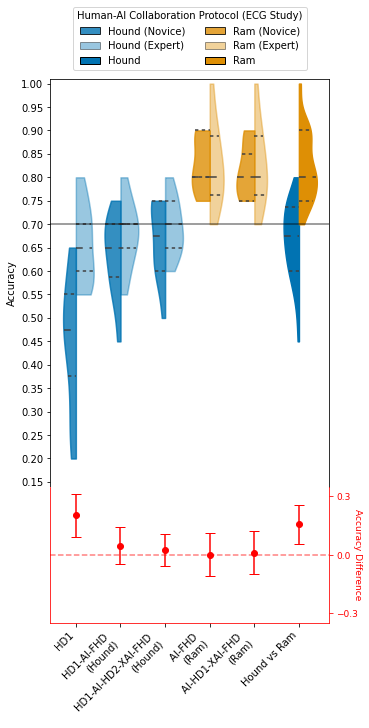

In [36]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

palette = sns.color_palette("colorblind", 2)
im = sns.violinplot(data=data_all, y="Accuracy", x="Protocol", hue="Expertise", cut=0, inner='quartile', positions=0, split=True, ax=axs[0])
for violin, alpha, color in zip(axs[0].collections, [0.8, 0.4]*5 + [1, 1], [palette[0]]*6 + [palette[1]]*4 + [palette[0], palette[1]]):
  violin.set_alpha(alpha)
  violin.set_color(color)

axs[0].axhline(y = 0.7, color='k', alpha=0.5, label='AI model')
axs[0].set_xlabel('')

handles, labels = axs[0].get_legend_handles_labels()


legend_elements = [#Line2D([0], [0], color='k', alpha=0.5, lw=4, label='AI model'),
                   Patch(facecolor=palette[0], alpha= 0.8, edgecolor='k',label='Hound (Novice)'),
                   Patch(facecolor=palette[0], alpha= 0.4, edgecolor='k',label='Hound (Expert)'),
                   Patch(facecolor=palette[0], alpha= 1.0, edgecolor='k',label='Hound'),
                   Patch(facecolor=palette[1], alpha= 0.8, edgecolor='k',label='Ram (Novice)'),
                   Patch(facecolor=palette[1], alpha= 0.4, edgecolor='k',label='Ram (Expert)'),
                   Patch(facecolor=palette[1], alpha= 1.0, edgecolor='k',label='Ram')]
axs[0].legend(handles = legend_elements, loc='center', bbox_to_anchor=(0.5,1.1), title="Human-AI Collaboration Protocol (ECG Study)", ncol=2)
axs[0].set_ylim(0.14, 1.01)
axs[0].set_yticks(np.array(range(15, 101, 5))/100)
axs[0].spines['bottom'].set_visible(False)

axs[1].set_xticklabels(data_all["Protocol"].unique(), rotation=45, ha="right")
axs[1].errorbar(x=range(len(data_all["Protocol"].unique())), y=means.values.flatten(), yerr=errors.values.flatten(), ls='none', fmt='o', capsize=5, color="red")
axs[1].set_ylim(-0.35, 0.35)
axs[1].yaxis.tick_right()
axs[1].axhline(y = 0.0, color='red', ls='--', alpha=0.5)
axs[1].set_yticks([-0.3, 0.0, 0.3])
axs[1].yaxis.set_tick_params(labelsize=9)
axs[1].set_ylabel("Accuracy Difference", rotation=270, fontsize=9, color="red")
axs[1].yaxis.set_label_position("right")
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_color('red')
axs[1].spines['left'].set_color('red')
axs[1].spines['right'].set_color('red')
axs[1].tick_params(axis='y', colors='red')



plt.savefig("ECG_distrib_accs_all.png", dpi=300, bbox_inches='tight')


In [37]:
def print_accs(table, name, group=None, expertise=None):
  filter_group = table["Group"] == group
  filter_expert = table["Expertise"] == expertise
  filter = np.array([True]*len(table))
  if group is not None:
    filter = filter & filter_group
  if expertise is not None:
    filter = filter & filter_expert
    
  mean = np.mean(table[filter][0])
  median = np.median(table[filter][0])
  std = 1.96*np.std(table[filter][0])/np.sqrt(len(table[filter]))
  print("%s: %.2f \pm %.2f" % (name, mean, std))
  print("%s: %.2f" % (name, median))

In [38]:
data_all = data_all_temp

group = "Hound"
table = accs_first
name = "HD1"
print_accs(table, name, group)

group = "Hound"
table = accs_before
name = "HD1-AI-HD2"
print_accs(table, name, group)

group = "Hound"
table = accs_after
name = "HD1-AI-HD2-XAI-FHD"
print_accs(table, name, group)

group = "Ram"
table = accs_before
name = "AI-HD2"
print_accs(table, name, group)

group = "Ram"
table = accs_after
name = "AI-HD2-XAI-FHD"
print_accs(table, name, group)

HD1: 0.54 \pm 0.07
HD1: 0.55
HD1-AI-HD2: 0.65 \pm 0.03
HD1-AI-HD2: 0.65
HD1-AI-HD2-XAI-FHD: 0.68 \pm 0.03
HD1-AI-HD2-XAI-FHD: 0.70
AI-HD2: 0.83 \pm 0.03
AI-HD2: 0.80
AI-HD2-XAI-FHD: 0.82 \pm 0.03
AI-HD2-XAI-FHD: 0.80


In [39]:
group = "Hound"
expertise = "Novice"
table = accs_first
name = "HD1"
print_accs(table, name, group, expertise)

group = "Hound"
expertise = "Novice"
table = accs_before
name = "HD1-AI-HD2"
print_accs(table, name, group, expertise)

group = "Hound"
expertise = "Novice"
table = accs_after
name = "HD1-AI-HD2-XAI-FHD"
print_accs(table, name, group, expertise)

group = "Ram"
expertise = "Novice"
table = accs_before
name = "AI-HD2"
print_accs(table, name, group, expertise)

group = "Ram"
expertise = "Novice"
table = accs_after
name = "AI-HD2-XAI-FHD"
print_accs(table, name, group, expertise)

HD1: 0.45 \pm 0.08
HD1: 0.47
HD1-AI-HD2: 0.63 \pm 0.05
HD1-AI-HD2: 0.65
HD1-AI-HD2-XAI-FHD: 0.67 \pm 0.05
HD1-AI-HD2-XAI-FHD: 0.68
AI-HD2: 0.83 \pm 0.03
AI-HD2: 0.80
AI-HD2-XAI-FHD: 0.82 \pm 0.03
AI-HD2-XAI-FHD: 0.80


In [40]:
group = "Hound"
expertise = "Expert"
table = accs_first
name = "HD1"
print_accs(table, name, group, expertise)

group = "Hound"
expertise = "Expert"
table = accs_before
name = "HD1-AI-HD2"
print_accs(table, name, group, expertise)

group = "Hound"
expertise = "Expert"
table = accs_after
name = "HD1-AI-HD2-XAI-FHD"
print_accs(table, name, group, expertise)

group = "Ram"
expertise = "Expert"
table = accs_before
name = "AI-HD2"
print_accs(table, name, group, expertise)

group = "Ram"
expertise = "Expert"
table = accs_after
name = "AI-HD2-XAI-FHD"
print_accs(table, name, group, expertise)

HD1: 0.66 \pm 0.05
HD1: 0.65
HD1-AI-HD2: 0.68 \pm 0.05
HD1-AI-HD2: 0.70
HD1-AI-HD2-XAI-FHD: 0.69 \pm 0.04
HD1-AI-HD2-XAI-FHD: 0.70
AI-HD2: 0.82 \pm 0.05
AI-HD2: 0.80
AI-HD2-XAI-FHD: 0.82 \pm 0.05
AI-HD2-XAI-FHD: 0.80


In [41]:
import scipy.stats as stats
import pingouin

def print_test(table1, table2, name1, name2,
               group1=None, group2=None, expertise1=None, expertise2=None, paired=False):
  filter_group1 = table1["Protocol"] == group1
  filter_expert1 = table1["Expertise"] == expertise1
  filter1 = np.array([True]*len(table1))
  if group1 is not None:
    filter1 = filter1 & filter_group1
  if expertise1 is not None:
    filter1 = filter1 & filter_expert1

  filter_group2 = table2["Protocol"] == group2
  filter_expert2 = table2["Expertise"] == expertise2
  filter2 = np.array([True]*len(table2))
  if group2 is not None:
    filter2 = filter2 & filter_group2
  if expertise2 is not None:
    filter2 = filter2 & filter_expert2

  size1 = np.sum(range(len(table1[filter1])))
  size2 = np.sum(range(len(table2[filter2])))
  size = np.min([size1, size2])

  test = pingouin.wilcoxon if paired else pingouin.mwu
  results = test(table1[filter1]["Accuracy"], table2[filter2]["Accuracy"])
  print("%s vs %s, pvalue: %.3f, effect-size (rbc) :%.2f" % 
        (name1,
         name2,
         results["p-val"],
         results["RBC"])
        )
  return results["p-val"], results["RBC"]

In [42]:
tables = data_all
protocols = data_all["Protocol"].unique()

idxnames = [n for n in protocols]

pvalues = pd.DataFrame(np.empty((5,1)), index=idxnames, columns=["pval"])
effects = pd.DataFrame(np.empty((5,1)), index=idxnames, columns=["effect"])

for i in range(len(protocols)):
      print(protocols[i])
      p, e = print_test(tables, tables, protocols[i], protocols[i], protocols[i], protocols[i], "Novice", "Expert")
      pvalues.loc[protocols[i], "pval"] = p.values
      effects.loc[protocols[i], "effect"] = e.values

HD1
HD1 vs HD1, pvalue: 0.002, effect-size (rbc) :0.80
HD1-AI-FHD 
(Hound)
HD1-AI-FHD 
(Hound) vs HD1-AI-FHD 
(Hound), pvalue: 0.308, effect-size (rbc) :0.27
HD1-AI-HD2-XAI-FHD 
(Hound)
HD1-AI-HD2-XAI-FHD 
(Hound) vs HD1-AI-HD2-XAI-FHD 
(Hound), pvalue: 0.608, effect-size (rbc) :0.14
AI-FHD 
(Ram)
AI-FHD 
(Ram) vs AI-FHD 
(Ram), pvalue: 0.823, effect-size (rbc) :-0.06
AI-HD1-XAI-FHD 
(Ram)
AI-HD1-XAI-FHD 
(Ram) vs AI-HD1-XAI-FHD 
(Ram), pvalue: 0.924, effect-size (rbc) :0.03


In [43]:
tables = data_all
protocols = data_all["Protocol"].unique()
expertises = ["Novice", "Expert"]

idxnames = pd.Series([n + ("" if n != "HD1" else " (" + e + ")") for n in protocols for e in expertises]).unique()

pvalues = pd.DataFrame(np.empty((6,6)), index=idxnames, columns=idxnames)
effects = pd.DataFrame(np.empty((6,6)), index=idxnames, columns=idxnames)

for i1 in range(len(protocols)):
  for i2 in range(len(protocols)):
    for j1 in range(len(expertises)):
      for j2 in range(len(expertises)):
        p1 = protocols[i1]
        e1 = expertises[j1] if p1 == "HD1" else None
        n1 = p1 + ("" if p1 != "HD1" else " (" + e1 + ")")

        p2 = protocols[i2]
        e2 = expertises[j2] if p2 == "HD1" else None
        n2 = p2 + ("" if p2 != "HD1" else " (" + e2 + ")")

        p, e = print_test(tables, tables, p1, p2, p1, p2, e1, e2)
        pvalues.loc[n1, n2] = p.values
        effects.loc[n1, n2] = e.values

HD1 vs HD1, pvalue: 1.000, effect-size (rbc) :0.00
HD1 vs HD1, pvalue: 0.002, effect-size (rbc) :0.80
HD1 vs HD1, pvalue: 0.002, effect-size (rbc) :-0.80
HD1 vs HD1, pvalue: 1.000, effect-size (rbc) :0.00
HD1 vs HD1-AI-FHD 
(Hound), pvalue: 0.000, effect-size (rbc) :0.79
HD1 vs HD1-AI-FHD 
(Hound), pvalue: 0.000, effect-size (rbc) :0.79
HD1 vs HD1-AI-FHD 
(Hound), pvalue: 0.982, effect-size (rbc) :0.01
HD1 vs HD1-AI-FHD 
(Hound), pvalue: 0.982, effect-size (rbc) :0.01
HD1 vs HD1-AI-HD2-XAI-FHD 
(Hound), pvalue: 0.000, effect-size (rbc) :0.86
HD1 vs HD1-AI-HD2-XAI-FHD 
(Hound), pvalue: 0.000, effect-size (rbc) :0.86
HD1 vs HD1-AI-HD2-XAI-FHD 
(Hound), pvalue: 0.393, effect-size (rbc) :0.20
HD1 vs HD1-AI-HD2-XAI-FHD 
(Hound), pvalue: 0.393, effect-size (rbc) :0.20
HD1 vs AI-FHD 
(Ram), pvalue: 0.000, effect-size (rbc) :1.00
HD1 vs AI-FHD 
(Ram), pvalue: 0.000, effect-size (rbc) :1.00
HD1 vs AI-FHD 
(Ram), pvalue: 0.000, effect-size (rbc) :0.86
HD1 vs AI-FHD 
(Ram), pvalue: 0.000, effect-

C:\Users\onyri\AppData\Local\Temp\ipykernel_9396\1898604980.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matrix, dtype=np.bool)
C:\Users\onyri\AppData\Local\Temp\ipykernel_9396\1898604980.py:67: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matrix, dtype=np.bool)
C:\Users\onyri\anaconda3\envs\machin

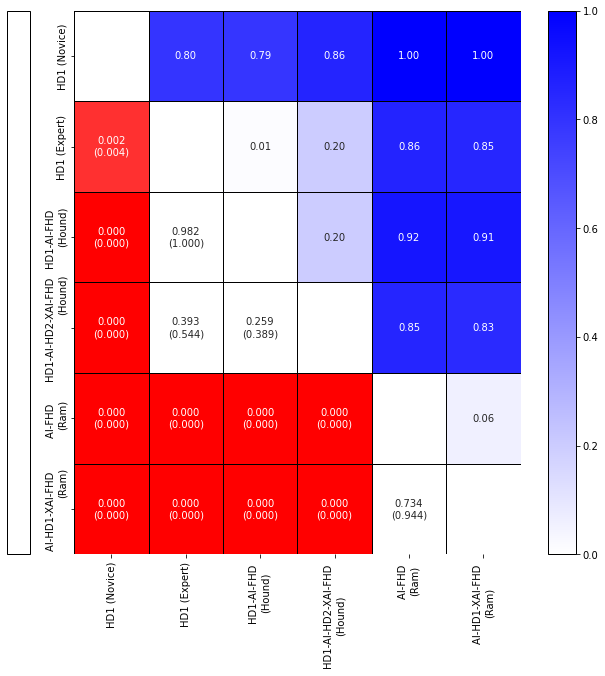

In [44]:
from statsmodels.stats import multitest as stmmulti
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(10,10))

pvalues_corr = pvalues.copy()
pvalues_corr.loc[:,:] = stmmulti.multipletests(pvalues.values.reshape(36,), method="fdr_bh")[1].reshape(6,6)
pvalues_annot = pvalues.applymap("{0:.3f}".format).astype(str) + "\n(" + pvalues_corr.applymap("{0:.3f}".format).astype(str) +")"

cdict = {'red':   [[0.0,  1.0, 1.0],
                   [1.0, 1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.67, 1.0, 1.0],
                   [1.0, 1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.67, 1.0, 1.0],
                   [1.0, 1.0, 1.0]]}
cmap =  colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=2048)



matrix = np.tril(pvalues)
ones = np.triu(np.ones(matrix.shape))
matrix += ones
matrix = pd.DataFrame(matrix, index=pvalues_corr.index, columns = pvalues_corr.index)
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
norm = colors.LogNorm(vmin=0.001, vmax=1)

cax = inset_axes(ax,
                 width="5%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 bbox_to_anchor=(-0.15, 0, 1, 1),
                 loc="lower left",
                 bbox_transform=ax.transAxes,
                 borderpad=0
                 )
cax.yaxis.set_ticks_position('left')

hm1 = sns.heatmap(matrix, 
                mask=mask, linewidth=1, linecolor='black',
                annot=pvalues_annot, fmt="s",
                cmap=cmap, cbar=True, norm=norm, vmin=0, vmax=1, ax=ax,
                cbar_ax=cax)
colorbar1 = hm1.collections[0].colorbar
colorbar1.set_ticks([0, 0.001,  0.01, 0.05, 0.1, 1])
colorbar1.set_ticklabels([0, "< 0.001", 0.01, 0.05, 0.1, 1])
colorbar1.outline.set_edgecolor('black')
colorbar1.outline.set_linewidth(1)
colorbar1.ax.yaxis.set_ticks_position("left")
colorbar1.ax.set_xlabel('p-value\n(adjusted)')




cdict = {'red':   [[0.0,  1.0, 1.0],
                   [1.0, 0.0, 0.0]],
         'green': [[0.0,  1.0, 1.0],
                   [1.0, 0.0, 0.0]],
         'blue':  [[0.0,  1.0, 1.0],
                   [1.0, 1.0, 1.0]]}
cmap =  colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=2048)

matrix = np.triu(np.abs(effects))
matrix = pd.DataFrame(matrix, index=effects.index, columns = effects.index)
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
hm2 = sns.heatmap(matrix, 
                mask=mask, linewidth=1, linecolor='black',
                annot=True, fmt=".2f",
                cmap=cmap, cbar=True, vmin=0, vmax=1, ax=ax)

colorbar2 = hm2.collections[1].colorbar
#colorbar2.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#colorbar2.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
colorbar2.outline.set_edgecolor('black')
colorbar2.outline.set_linewidth(1)
colorbar2.ax.set_xlabel('Effect size\n(RBC)')






plt.savefig("ECG-info.png", dpi=300, bbox_inches="tight")

In [ ]:
accs_before

0  Group Expertise
0   0.45  Hound    Novice
1   0.55  Hound    Novice
2   0.65  Hound    Novice
3   0.75  Hound    Expert
4   0.75  Hound    Novice
5   0.70  Hound    Expert
6   0.55  Hound    Novice
7   0.65  Hound    Expert
8   0.65  Hound    Expert
9   0.55  Hound    Expert
10  0.70  Hound    Novice
11  0.70  Hound    Expert
12  0.70  Hound    Novice
13  0.70  Hound    Novice
14  0.60  Hound    Novice
15  0.60  Hound    Expert
16  0.60  Hound    Novice
17  0.70  Hound    Novice
18  0.65  Hound    Novice
19  0.80  Hound    Expert
20  0.70  Hound    Expert
21  0.80    Ram    Expert
22  0.80    Ram    Novice
23  0.85    Ram    Novice
24  0.80    Ram    Novice
25  0.75    Ram    Expert
26  0.90    Ram    Novice
27  0.80    Ram    Expert
28  0.85    Ram    Expert
29  0.90    Ram    Expert
30  0.90    Ram    Novice
31  0.80    Ram    Novice
32  0.90    Ram    Expert
33  0.75    Ram    Novice
34  0.90    Ram    Novice
35  0.80    Ram    Expert
36  0.75    Ram    Novice
37  0.85    Ram    Novice
38  0.70    Ram    Expert
39  0.75    Ram    Novice
40  0.90    Ram    Novice
41  0.75    Ram    Expert
42  0.80    Ram    Novice
43  1.00    Ram    Expert

In [ ]:
diff_fb_h_n = accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Novice")][0] - accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Novice")][0]
diff_fb_h_e = accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Expert")][0] - accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Expert")][0]
diff_fb_h = accs_before[accs_before["Group"] == "Hound"][0] - accs_first[accs_first["Group"] == "Hound"][0]

diff_fa_h_n = accs_after[(accs_after["Group"] == "Hound") & (accs_after["Expertise"] == "Novice")][0] - accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Novice")][0]
diff_fa_h_e = accs_after[(accs_after["Group"] == "Hound") & (accs_after["Expertise"] == "Expert")][0] - accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Expert")][0]
diff_fa_h = accs_after[accs_after["Group"] == "Hound"][0] - accs_first[accs_first["Group"] == "Hound"][0]

diff_ba_h_n = accs_after[(accs_after["Group"] == "Hound") & (accs_after["Expertise"] == "Novice")][0] - accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Novice")][0]
diff_ba_h_e = accs_after[(accs_after["Group"] == "Hound") & (accs_after["Expertise"] == "Expert")][0] - accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Expert")][0]
diff_ba_h = accs_after[accs_after["Group"] == "Hound"][0] - accs_before[accs_before["Group"] == "Hound"][0]

diff_ba_r_n = accs_after[(accs_after["Group"] == "Ram") & (accs_after["Expertise"] == "Novice")][0] - accs_before[(accs_before["Group"] == "Ram") & (accs_before["Expertise"] == "Novice")][0]
diff_ba_r_e = accs_after[(accs_after["Group"] == "Ram") & (accs_after["Expertise"] == "Expert")][0] - accs_before[(accs_before["Group"] == "Ram") & (accs_before["Expertise"] == "Expert")][0]
diff_ba_r = accs_after[accs_after["Group"] == "Ram"][0] - accs_before[accs_before["Group"] == "Ram"][0]


diff_ba_n = accs_after[accs_after["Expertise"] == "Novice"][0] - accs_before[accs_before["Expertise"] == "Novice"][0]
diff_ba_e = accs_after[accs_after["Expertise"] == "Expert"][0] - accs_before[accs_before["Expertise"] == "Expert"][0]

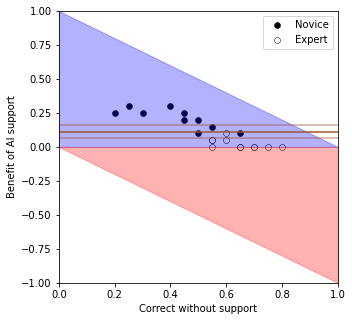

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Novice")][0],
                y=diff_fb_h_n, color="black", edgecolor="black", alpha=1, label="Novice")
sns.scatterplot(x=accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Expert")][0],
                y=diff_fb_h_e, color="white", edgecolor="black", alpha=1, label="Expert")

vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
plt.fill_between(vals, - vals, alpha=0.3, color="red" )

plt.axhline(np.mean(diff_fb_h), color="sienna")
plt.axhline(np.mean(diff_fb_h) + 1.96*np.std(diff_fb_h)/np.sqrt(len(diff_fb_h)), color="sienna", alpha=0.5)
plt.axhline(np.mean(diff_fb_h) - 1.96*np.std(diff_fb_h)/np.sqrt(len(diff_fb_h)), color="sienna", alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.xlabel("Accuracy (HD1)")
plt.ylabel("Benefit of AI support (= HD1-AI-FHD - HD1)")

plt.savefig("AI_vs_noAI_Hound_bd.png", dpi=300, bbox_inches="tight")

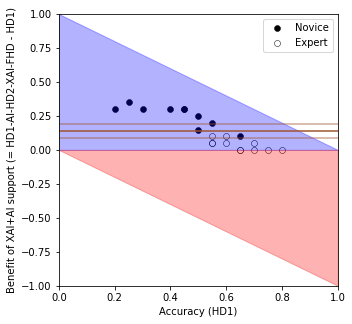

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Novice")][0],
                y=diff_fa_h_n, color="black", edgecolor="black", alpha=1, label="Novice")
sns.scatterplot(x=accs_first[(accs_first["Group"] == "Hound") & (accs_first["Expertise"] == "Expert")][0],
                y=diff_fa_h_e, color="white", edgecolor="black", alpha=1, label="Expert")

vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
plt.fill_between(vals, - vals, alpha=0.3, color="red" )

plt.axhline(np.mean(diff_fa_h), color="sienna")
plt.axhline(np.mean(diff_fa_h) + 1.96*np.std(diff_fa_h)/np.sqrt(len(diff_fa_h)), color="sienna", alpha=0.5)
plt.axhline(np.mean(diff_fa_h) - 1.96*np.std(diff_fa_h)/np.sqrt(len(diff_fa_h)), color="sienna", alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.xlabel("Accuracy (HD1)")
plt.ylabel("Benefit of XAI+AI support (= HD1-AI-HD2-XAI-FHD - HD1)")

plt.savefig("XAI_vs_noAI_Hound_bd.png", dpi=300, bbox_inches="tight")

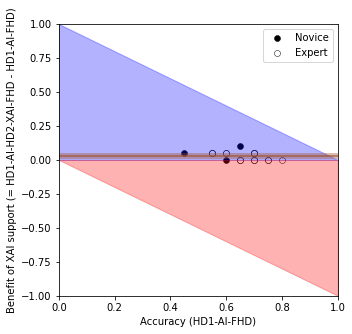

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Novice")][0],
                y=diff_ba_h_n, color="black", edgecolor="black", alpha=1, label="Novice")
sns.scatterplot(x=accs_before[(accs_before["Group"] == "Hound") & (accs_before["Expertise"] == "Expert")][0],
                y=diff_ba_h_e, color="white", edgecolor="black", alpha=1, label="Expert")

vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
plt.fill_between(vals, - vals, alpha=0.3, color="red" )

plt.axhline(np.mean(diff_ba_h), color="sienna")
plt.axhline(np.mean(diff_ba_h) + 1.96*np.std(diff_ba_h)/np.sqrt(len(diff_ba_h)), color="sienna", alpha=0.5)
plt.axhline(np.mean(diff_ba_h) - 1.96*np.std(diff_ba_h)/np.sqrt(len(diff_ba_h)), color="sienna", alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.xlabel("Accuracy (HD1-AI-FHD)")
plt.ylabel("Benefit of XAI support (= HD1-AI-HD2-XAI-FHD - HD1-AI-FHD)")

plt.savefig("XAI_vs_noXAI_Hound_bd.png", dpi=300, bbox_inches="tight")

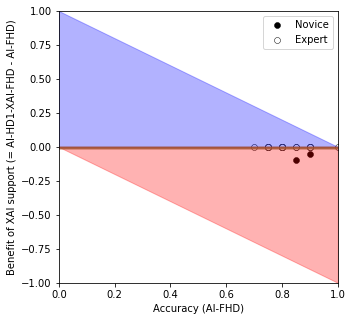

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=accs_before[(accs_before["Group"] == "Ram") & (accs_before["Expertise"] == "Novice")][0],
                y=diff_ba_r_n, color="black", edgecolor="black", alpha=1, label="Novice")
sns.scatterplot(x=accs_before[(accs_before["Group"] == "Ram") & (accs_before["Expertise"] == "Expert")][0],
                y=diff_ba_r_e, color="white", edgecolor="black", alpha=1, label="Expert")

vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
plt.fill_between(vals, - vals, alpha=0.3, color="red" )

plt.axhline(np.mean(diff_ba_r), color="sienna")
plt.axhline(np.mean(diff_ba_r) + 1.96*np.std(diff_ba_r)/np.sqrt(len(diff_ba_r)), color="sienna", alpha=0.5)
plt.axhline(np.mean(diff_ba_r) - 1.96*np.std(diff_ba_r)/np.sqrt(len(diff_ba_r)), color="sienna", alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.xlabel("Accuracy (AI-FHD)")
plt.ylabel("Benefit of XAI support (= AI-HD1-XAI-FHD - AI-FHD)")

plt.savefig("XAI_vs_noXAI_Ram_bd.png", dpi=300, bbox_inches="tight")

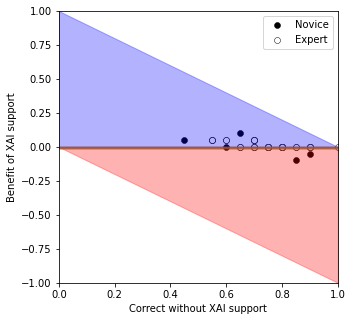

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=accs_before[(accs_before["Expertise"] == "Novice")][0],
                y=diff_ba_n, color="black", edgecolor="black", alpha=1, label="Novice")
sns.scatterplot(x=accs_before[(accs_before["Expertise"] == "Expert")][0],
                y=diff_ba_e, color="white", edgecolor="black", alpha=1, label="Expert")

vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
plt.fill_between(vals, - vals, alpha=0.3, color="red" )

plt.axhline(np.mean(diff_ba_r), color="sienna")
plt.axhline(np.mean(diff_ba_r) + 1.96*np.std(diff_ba_r)/np.sqrt(len(diff_ba_r)), color="sienna", alpha=0.5)
plt.axhline(np.mean(diff_ba_r) - 1.96*np.std(diff_ba_r)/np.sqrt(len(diff_ba_r)), color="sienna", alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.xlabel("Correct without XAI support")
plt.ylabel("Benefit of XAI support")

plt.savefig("ECG_study_XAI.png", dpi=300, bbox_inches="tight")

In [ ]:
trust_A = np.array([4,3,5,3,3,3,4,3,3,4,5,3,1,4,3,4,4,3,np.nan,5,3,3])
trust_B = np.array([4,4,5,4,3,4,5,1,4,4,5,3,np.nan,5,5,4,4,4,3,np.nan,4,4])

In [ ]:
util.groupby(by=["Group","Expertise"]).mean()

0
Group Expertise          
Hound Expert     3.307143
      Novice     4.817857
Ram   Expert     4.016667
      Novice     4.571429

In [ ]:
timings = pd.read_csv("A-alltimings.csv")
quests = list(pd.Series([c if "gr" in c else None for c in timings.columns]).dropna().unique())
cols = ["Partecipante"] + list(pd.Series([c if "gr" in c else None for c in timings.columns]).dropna().unique())
timings = timings[cols]

tot_noAI = []
tot_AI = []
tot_XAI = []
count = 0
for i in range(timings.shape[0]):
  for j in range(1,len(cols)):
    if count == 0:
      tot_noAI.append(float(timings.iloc[i,j]))
    elif count == 1:
      tot_AI.append(float(timings.iloc[i,j]))
    elif count == 2:
      tot_XAI.append(float(timings.iloc[i,j]))
    count+=1
    if count > 3:
      count = 0

tot_noAI = np.array(tot_noAI)
tot_AI = np.array(tot_AI)
tot_XAI = np.array(tot_XAI)

In [ ]:
from scipy import stats
tot_noAI[(np.abs(stats.zscore(tot_noAI)) < 3)].mean()


22.448077709611454

In [ ]:
tot_AI[(np.abs(stats.zscore(tot_AI)) < 3)].mean()

112.90863543788187

In [ ]:
tot_XAI[(np.abs(stats.zscore(tot_XAI)) < 3)].mean()

24.157402862985688

In [ ]:
print(np.median(tot_noAI))
print(np.median(tot_AI))
print(np.median(tot_XAI))

11.77
33.045
12.5


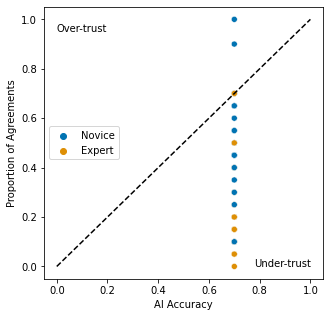

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

eq_ai = np.array(eq_ai)

palette = sns.color_palette("colorblind", 2)

trust_data = pd.DataFrame([[0.7]*len(eq_ai), eq_ai/20, data["Expertise"]]).T
trust_data.columns = ["AI Accuracy", "Proportion of Agreements", "Expertise"]

plt.figure(figsize=(5,5))
sns.scatterplot(data=trust_data, x="AI Accuracy", y="Proportion of Agreements", hue="Expertise", palette=palette)
plt.plot([0,1], [0,1], 'k--')

groups = trust_data.groupby(by="Expertise")["Proportion of Agreements"].agg(['mean','std','count'])
errorn = 1.96*groups.loc["Novice","std"]/np.sqrt(groups.loc["Novice","count"])
errore = 1.96*groups.loc["Expert","std"]/np.sqrt(groups.loc["Expert","count"])

circle1 = plt.Circle((0.7, groups.loc["Novice","mean"]), errorn, color=palette[0], label="Novice")
circle2 = plt.Circle((0.7, groups.loc["Expert","mean"]), errore, color=palette[1], label="Expert")
#plt.gca().add_patch(circle1)
#plt.gca().add_patch(circle2)
plt.legend(loc="center left")
plt.annotate("Over-trust", xy=(0.0,0.95))
plt.annotate("Under-trust", xy=(0.78,0.0))

plt.savefig("all_trust_ecg.png", dpi=300, bbox_inches="tight")

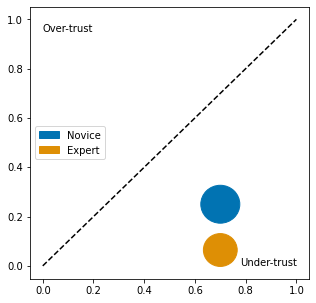

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#eq_ai_after = np.array(eq_ai_after)[data["Group"] == "Hound"]

palette = sns.color_palette("colorblind", 2)

trust_data = pd.DataFrame([[0.7]*len(eq_ai_after), eq_ai_after/20, data[data["Group"] == "Hound"]["Expertise"]]).T
trust_data.columns = ["AI Accuracy", "Proportion of Agreements", "Expertise"]

plt.figure(figsize=(5,5))
#sns.scatterplot(data=trust_data, x="AI Accuracy", y="Proportion of Agreements", hue="Expertise", palette=palette)
plt.plot([0,1], [0,1], 'k--')

groups = trust_data.groupby(by="Expertise")["Proportion of Agreements"].agg(['mean','std','count'])
errorn = 1.96*groups.loc["Novice","std"]/np.sqrt(groups.loc["Novice","count"])
errore = 1.96*groups.loc["Expert","std"]/np.sqrt(groups.loc["Expert","count"])

circle1 = plt.Circle((0.7, groups.loc["Novice","mean"]), errorn, color=palette[0], label="Novice")
circle2 = plt.Circle((0.7, groups.loc["Expert","mean"]), errore, color=palette[1], label="Expert")
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.legend(loc="center left")
plt.annotate("Over-trust", xy=(0.0,0.95))
plt.annotate("Under-trust", xy=(0.78,0.0))

plt.savefig("avg_trust_ecg_after.png", dpi=300, bbox_inches="tight")

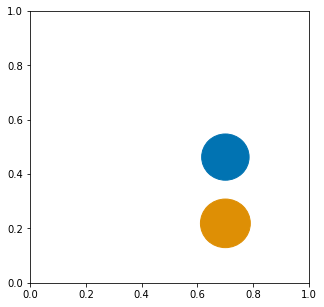

In [ ]:
error

0.0850387166726623